## Importing packages

In [1]:
import os, sys

sys.path.insert(0, os.path.dirname(os.path.abspath('..')))
from mass_automation.formula.plot import plot_compare
from mass_automation.experiment import Experiment

from sequencing_help import fragments, plot_seq
import gc

### Compound presence verification algorithm 

allows detect single-charge ions formed as a result of fragmentation of small peptides.

This can be done with the use of rules, how peptides are fragmented in MS ( these rules are coded in *sequencing_help.py* ) 

Let's create a dictionary where keys are spectra filenames and values are tuples with aminoacid chain and fragmented ion types

<b> !! The names of peptides spectra are given by default. If you changed names, you have to change it also in the cell below !! </b>

In [2]:
chain_dict = {
    "ECD_Substance_P.mzXML" : ('RPKPQQFFGLM', ('c')),
    "CID_Substance_P.mzXML" : ('RPKPQQFFGLM', ('b')),
    "CID_BSE_digest.mzXML" : ('LVVSTQTALA', ('b'))
}

Now we can perform fragment ion annotation and visualize results

<b> !! The directory path below is just an example. Specify folder where peptides spectra are located on your device in the cell below!! </b>

In [3]:
dir_path = 'D:\\mass_spectra\\proteins_spectra\\'

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:45<00:00,  4.14s/it]


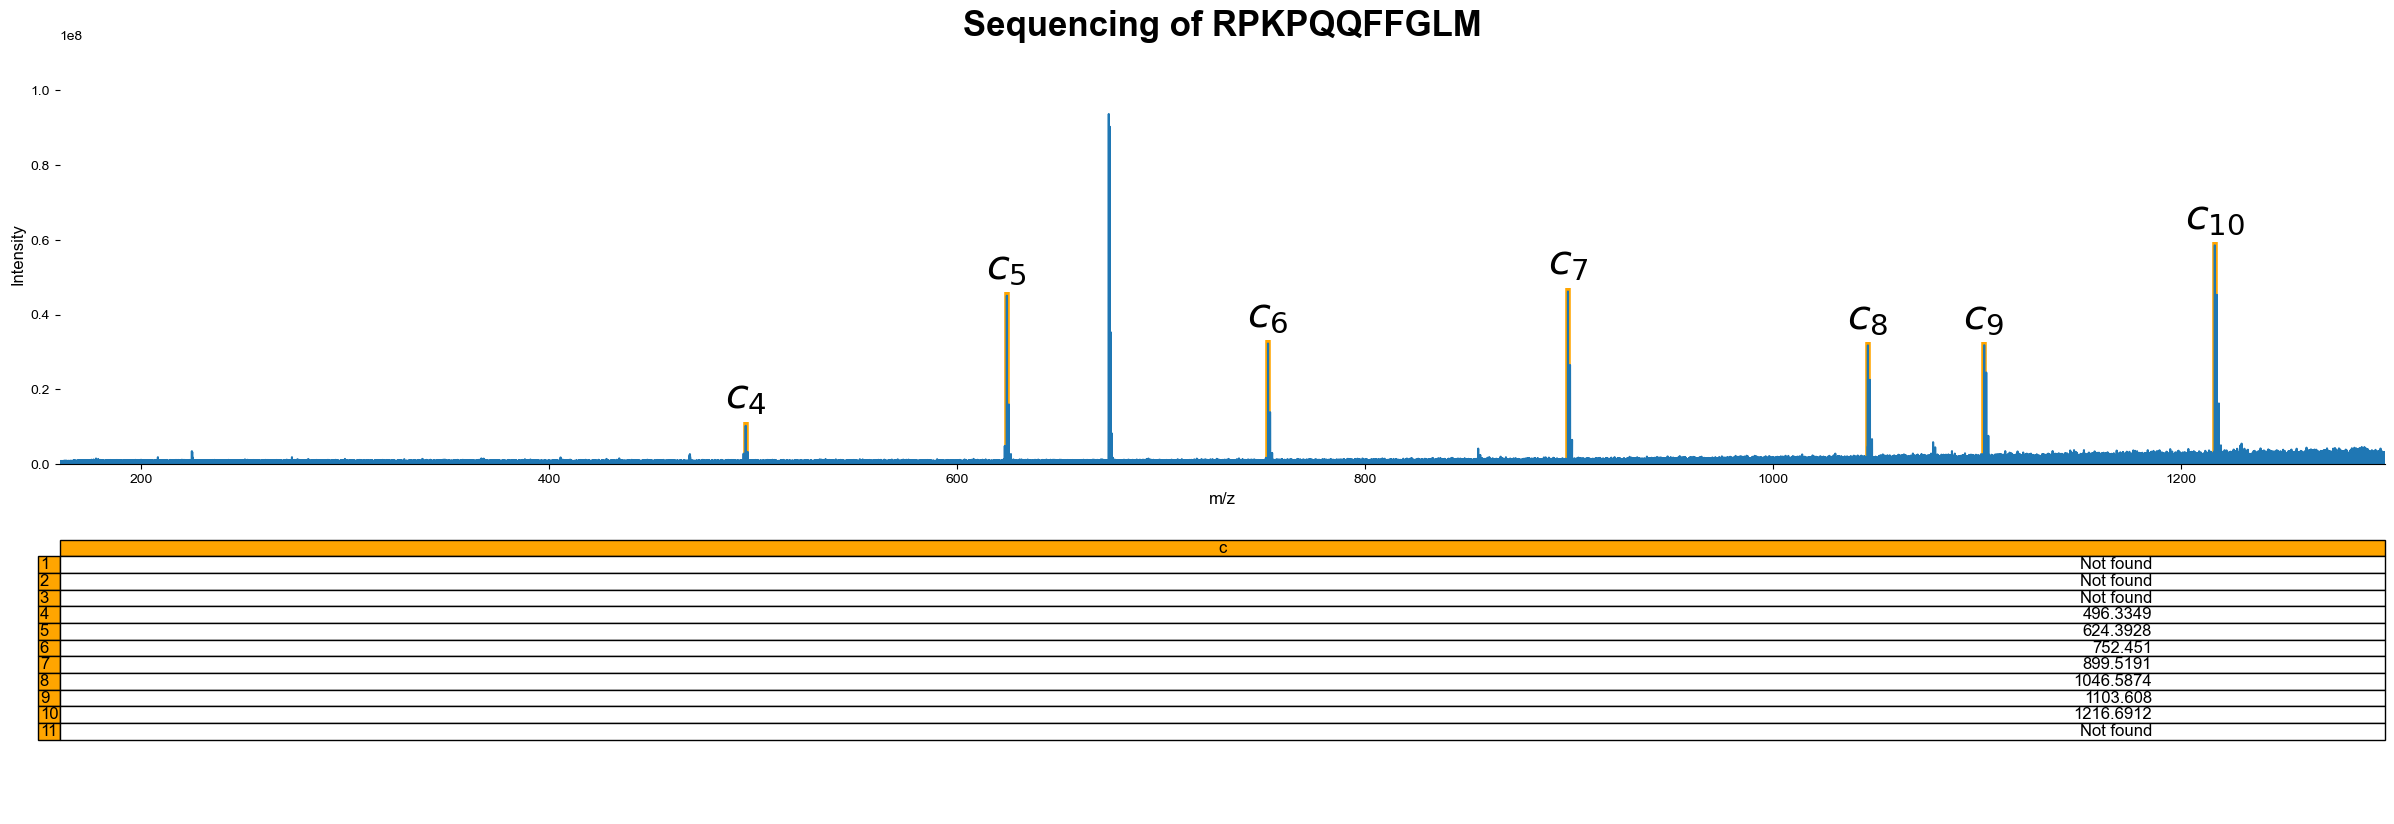

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:42<00:00,  3.83s/it]


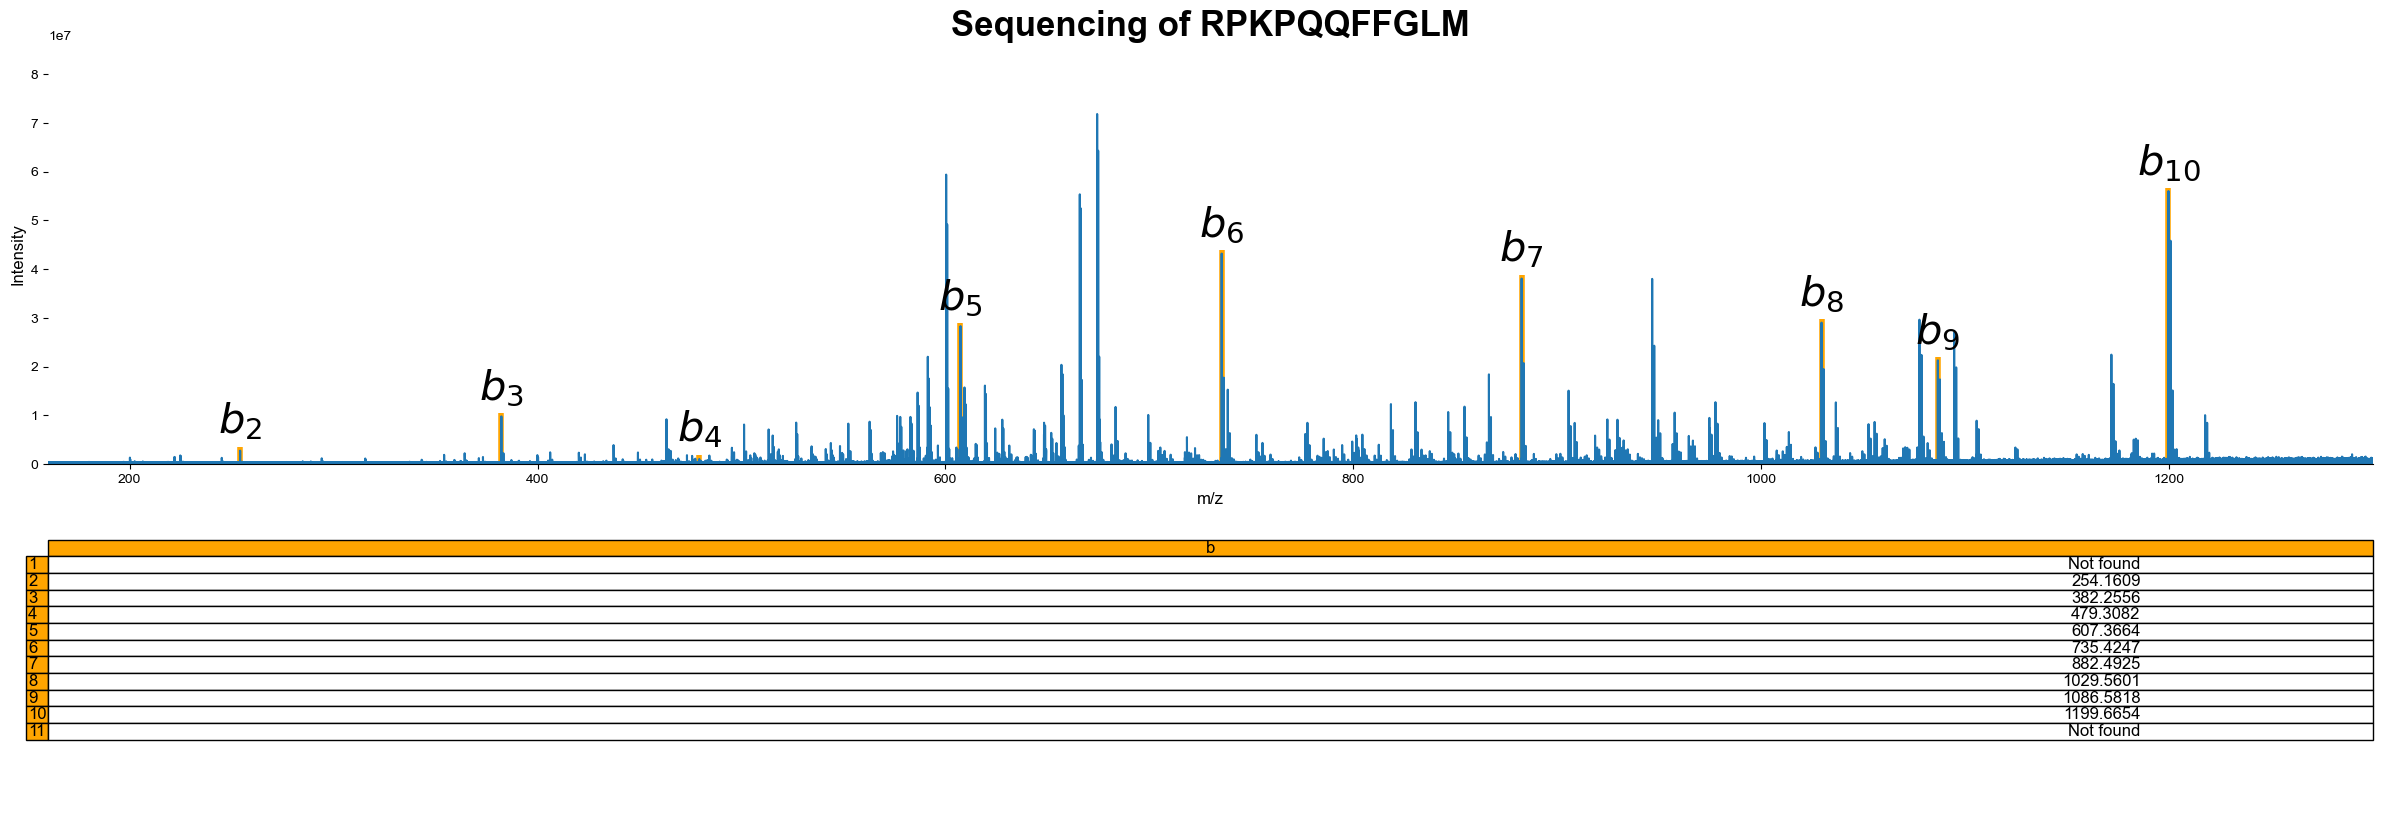

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.12s/it]


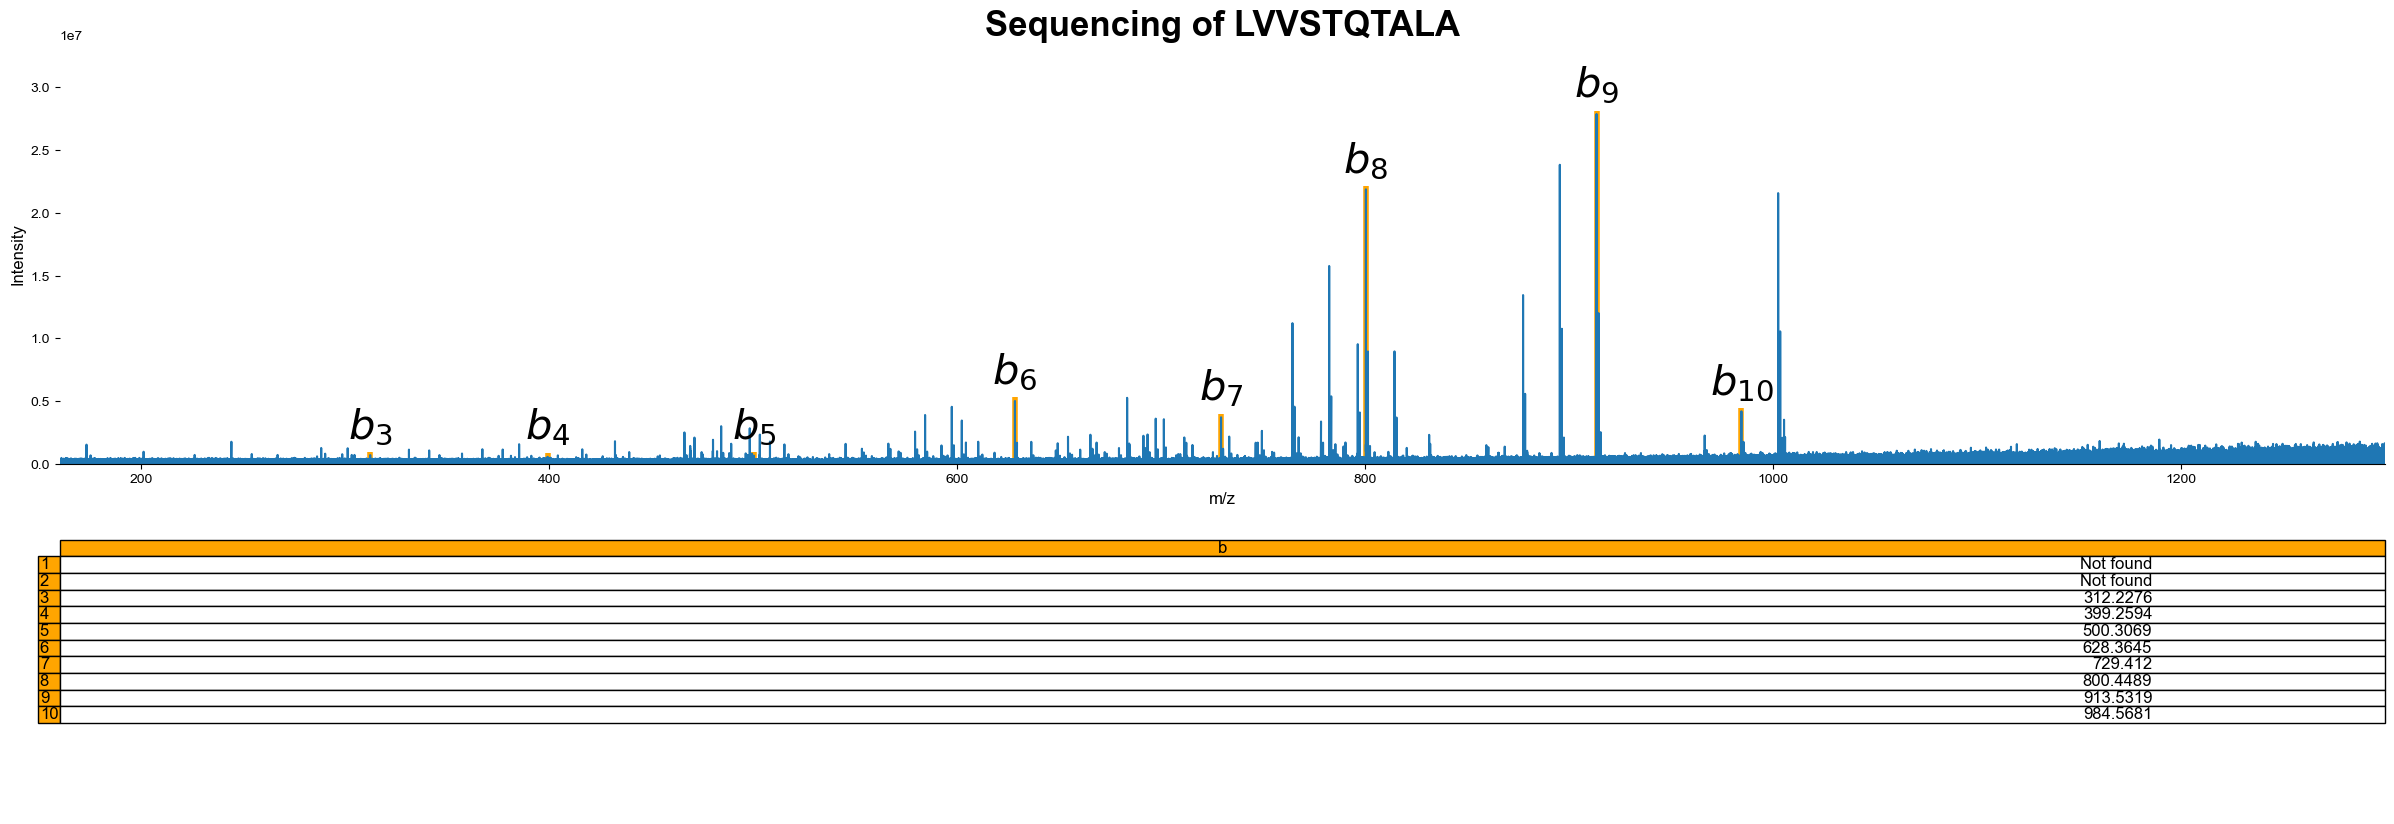

In [4]:
for name in chain_dict.keys():
    if name.split('.')[1] == 'mzXML':
        exp = Experiment(os.path.join(dir_path, name))
        spec = exp[0]  # Experiment object contain only one spectrum
        plot_seq(spec, # Spectrum, where we want to annotate ions
                 chain_dict[name][0],  # Aminoacid chain
                 types=chain_dict[name][1],  # fragmented ion types typle
                 )
        
        del exp, spec  # Avoid MemoryError
        gc.collect()

# wonderful! 

### Low intensity ion detection

In [5]:
# This function generates all possible ion formulas for aminoacid and fragmented ion type
frag_dict = fragments('RPKPQQFFGLM', 'b')
frag_dict

{('R', 'b'): <mass_automation.formula.Formula at 0x1fa188edd00>,
 ('RP', 'b'): <mass_automation.formula.Formula at 0x1fa12f65820>,
 ('RPK', 'b'): <mass_automation.formula.Formula at 0x1fa188edd30>,
 ('RPKP', 'b'): <mass_automation.formula.Formula at 0x1fa188ed850>,
 ('RPKPQ', 'b'): <mass_automation.formula.Formula at 0x1fa1eb84a00>,
 ('RPKPQQ', 'b'): <mass_automation.formula.Formula at 0x1fa1eb846d0>,
 ('RPKPQQF', 'b'): <mass_automation.formula.Formula at 0x1fa188ed730>,
 ('RPKPQQFF', 'b'): <mass_automation.formula.Formula at 0x1fa1eb84580>,
 ('RPKPQQFFG', 'b'): <mass_automation.formula.Formula at 0x1fa1eb847f0>,
 ('RPKPQQFFGL', 'b'): <mass_automation.formula.Formula at 0x1fa1eb84550>,
 ('RPKPQQFFGLM', 'b'): <mass_automation.formula.Formula at 0x1fa1eb846a0>}

In [6]:
exp = Experiment(os.path.join(dir_path, 'CID_Substance_P.mzXML'))
spec = exp[0]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.71it/s]


Here we are going to detect low intensity ion in Substance P CID spectrum

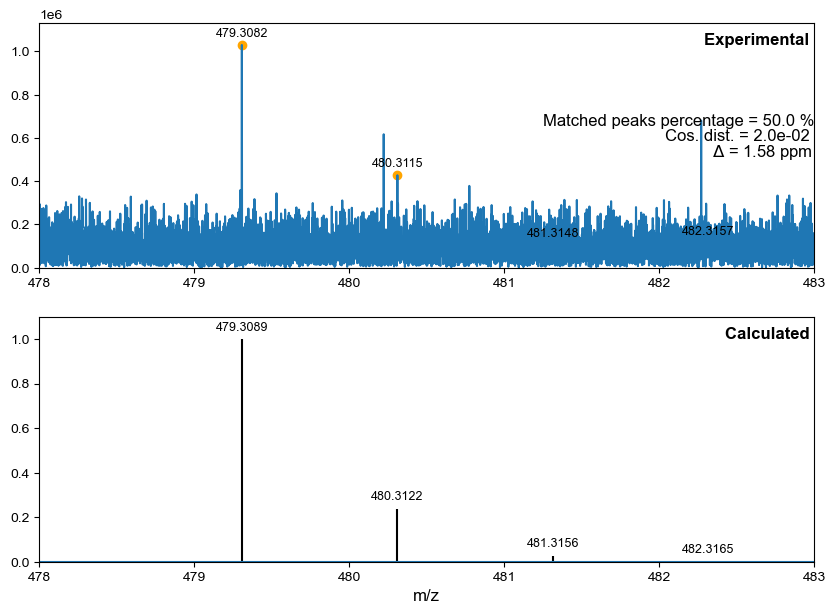

In [7]:
plot_compare(spec,
             frag_dict[('RPKP', 'b')],
             cal_error=0.01)

Now you can annotate fragmented ions of small peptides! Congratulations!